In [271]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [252]:
data = pd.read_csv("./data/auto-mpg.csv", index_col="car name", na_values="?")

In [253]:
print(data.shape)
data = data.dropna()
print(data.shape)

(398, 8)
(392, 8)


In [254]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']

### Unscaled data

In [321]:
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

### Scaled data -- remove the mean and scale to unit variance

In [322]:
X = preprocessing.StandardScaler().fit_transform(X)

### Scaled feature -- Scale each feature to a given range

In [150]:
X = preprocessing.MinMaxScaler().fit_transform(X)

## Linear model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=23)

In [126]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [128]:
print(reg.coef_)
print(reg.intercept_)

[-0.18936072  1.26922013 -0.19960495  0.29568512 -5.8700961   1.23099074
  2.99215751]
23.745728966438474


In [129]:
y_pred = reg.predict(X_test)

In [130]:
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print('RMSE of the linear model using scaled data is {:.2f}'.format(rmse))

RMSE of the linear model using scaled data is 3.49


In [131]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='markers+lines', name='True value'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='markers+lines', name='Predicted value'))
fig.show()

## Ridge Regression

In [286]:
reg = linear_model.RidgeCV(alphas=np.logspace(-5, 5, 11))
reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [287]:
print(reg.alpha_)
print(reg.coef_)
print(reg.intercept_)

0.1
[ -0.48924912   3.51653397  -1.54905092   1.27816366 -22.87725793
   3.05175415   9.66350212]
25.916679541513354


In [288]:
y_pred = reg.predict(X_test)

In [289]:
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print('RMSE of the linear model using scaled data is {:.2f}'.format(rmse))

RMSE of the linear model using scaled data is 3.49


In [290]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='markers+lines', name='True value'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='markers+lines', name='Predicted value'))
fig.show()

## Lasso

In [327]:
reg = linear_model.LassoCV(cv=20).fit(X_train, y_train)
reg.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=20, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [328]:
print(reg.alpha_)
print(reg.coef_)
print(reg.intercept_)

0.04242727612742048
[ -0.          -0.          -0.           0.         -21.10470581
   2.6954816    9.44341123]
26.455673834714652


In [329]:
y_pred = reg.predict(X_test)

In [330]:
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print('RMSE of the linear model using scaled data is {:.2f}'.format(rmse))

RMSE of the linear model using scaled data is 3.48


In [331]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='markers+lines', name='True value'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='markers+lines', name='Predicted value'))
fig.show()

Computing regularization path using the coordinate descent lasso...


(-0.4736317030906113,
 2.8042866581352115,
 -0.742581493089443,
 90.43027707130221)

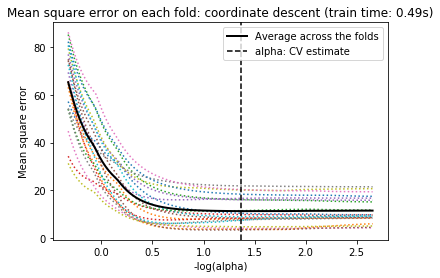

In [310]:
# Compute paths
print("Computing regularization path using the coordinate descent lasso...")

# Display results
EPSILON = 1e-4
m_log_alphas = -np.log10(reg.alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, reg.mse_path_, ':')
plt.plot(m_log_alphas, reg.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')

## Lars

In [323]:
reg = linear_model.LassoLarsCV(cv=20).fit(X_train, y_train)
reg.fit(X_train, y_train)

LassoLarsCV(copy_X=True, cv=20, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
            positive=False, precompute='auto', verbose=False)

In [324]:
print(reg.alpha_)
print(reg.coef_)
print(reg.intercept_)

0.003604813193561098
[  0.           0.           0.           0.8234281  -21.43639076
   2.61163408   9.49107343]
26.207449634360277


In [325]:
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print('RMSE of the linear model using scaled data is {:.2f}'.format(rmse))

RMSE of the linear model using scaled data is 3.51


In [326]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='markers+lines', name='True value'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='markers+lines', name='Predicted value'))
fig.show()

.[0.         0.14847382 0.24542724 0.3161068  0.3641058  0.38026843
 0.39477907 0.64033387 0.99881087 1.        ]
[[  0.           0.           0.           0.           2.12880564
    0.           0.           0.           5.7074602    5.70127323]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.05411101]
 [  0.           0.           0.           0.           0.
    3.9785745    5.58357084  21.83146851  38.74799696  38.77482594]
 [  0.           0.          14.85048498  21.32446399  23.19411812
   23.69312176  23.60695613  27.6671686   32.46934758  32.48464189]
 [  0.           0.           0.           0.           0.
    0.           0.         -15.58283604 -39.65885252 -39.73369314]
 [  0.           0.           0.           4.82810106   8.61608607
    8.69235515   9.47436041   7.46806392   5.37200984   5.37010026]
 [  0.          20.37991093  18.83750965  17.23709298  16.03911936
   15.83260323  15.52353569  15.3

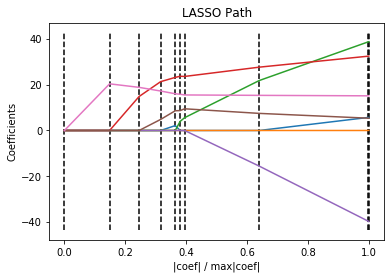

In [320]:
_, _, coefs = linear_model.lars_path(X_train, y_train, method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
print(xx)
print(coefs)
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()